Nina is trying out stuff


In [2]:
from mysql.connector import MySQLConnection, Error
import pandas as pd
from sqlalchemy import create_engine 
import pymysql

from connection_config import read_db_config


Create connection arguments


In [3]:
conn_string,ssl_args = read_db_config('teama.teama')
engine = create_engine(conn_string,connect_args=ssl_args)

Load data into pandas dataframe and upload that then onto the database


In [4]:
# apple_mobility_df = pd.read_csv('/Users/Nina/Documents/Big-Data-Challenge-Team-A/Nina_data/applemobilitytrends-2020-09-07.csv',header = 0)
# apple_mobility_df.to_sql('applemobilitytrends_raw',con = engine,if_exists = 'fail')

In [34]:
apple_mob_df = pd.read_sql('SELECT * FROM applemobilitytrends_raw', con=engine)

In [73]:
apple_mob_uk = apple_mob_df[apple_mob_df['region'] == 'United Kingdom']
apple_mob_uk = apple_mob_uk.iloc[:,7:]
transpose_df = apple_mob_uk.transpose()
transpose_df.rename(columns={143:'driving', 144:'transit', 145:'walking'}, inplace=True)
transpose_df.index = pd.to_datetime(transpose_df.index)
transpose_df.head()

,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,104.86,104.20,106.14
2020-01-15,106.40,105.37,114.37
2020-01-16,104.28,103.89,112.59
2020-01-17,109.27,109.38,128.99


<Figure size 432x288 with 0 Axes>

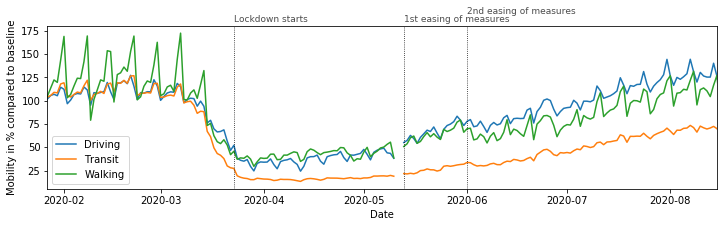

<Figure size 864x216 with 0 Axes>

In [100]:
# plot apple mobility data for UK

import matplotlib.pyplot as plt
import datetime


fig = plt.figure()
ax1 = plt.subplots(figsize=(12,3))

plt.plot(transpose_df.index, transpose_df['driving'], label='Driving')
plt.plot(transpose_df.index, transpose_df['transit'], label='Transit')
plt.plot(transpose_df.index, transpose_df['walking'], label='Walking')
plt.xlabel('Date')
plt.ylabel('Mobility in % compared to baseline')
plt.legend()
# stay at home order
home = pd.to_datetime('2020-03-23')
plt.axvline(x=home, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=home, y= 185, s='Lockdown starts', alpha=0.7, color='black', fontsize= 9)
# 1st easing of lockdown measures: 
ease_1 = pd.to_datetime('2020-05-13')
plt.axvline(x=ease_1, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_1, y= 185, s='1st easing of measures', alpha=0.7, color='black', fontsize= 9)     
# 2nd easing of lockdown measures: 
ease_2 = pd.to_datetime('2020-06-01')
plt.axvline(x=ease_2, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_2, y= 193, s='2nd easing of measures', alpha=0.7, color='black', fontsize= 9)  


plt.xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])

plt.figure(figsize=(12,3))



plt.show()

In [ ]:
# google_mobility_df = pd.read_csv('/Users/Nina/Documents/Big-Data-Challenge-Team-A/Nina_data/Google_Global_Mobility_Report.csv',header = 0)
# google_mobility_df.to_sql('Google_Global_Mobility_Report_raw',con = engine,if_exists = 'fail')

